<a href="https://colab.research.google.com/github/tonykelly00/bigs/blob/main/Test_Neuron_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
# This is formatted as code
```

# **CC and VC Model**

Tony Kelly

The goal of this practical course is to use experimental and computational approaches to reinforce and expand upon some of the concepts taught in the ‘Intracellular Electrophysiology Recordings’ lecture by making the theoretical concepts tangible and interactive – & maybe fun.

### Computational Model
First we need to install NEURON and we will use the package installer for Python (pip). There needs to be a localy installed version of Neuron. This can take some time if NEURON is not yet installed on your side. 

[test this on a system without Neuron.]

In [1]:
!pip install neuron

     |████████████████████████████████| 12.6 MB 202 kB/s 


We also need to load some basic scripts to make the work-flow more convienent.

This way adds scrips from my github repo.
could also try adding via link to local copy???

In [2]:
# Clone the entire repo.
!git clone -l -s git://github.com/tonykelly00/bigs.git cloned-repo
%cd cloned-repo
!ls

!python BIGS_ephys.py
from neuron import h, gui
import matplotlib.pyplot as plt
import numpy as np

from BIGS_ephys import mk_soma
from BIGS_ephys import run
from BIGS_ephys import attach_IC
from BIGS_ephys import attach_dend
from BIGS_ephys import attach_VC

Cloning into 'cloned-repo'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 12 (delta 2), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (12/12), 4.90 KiB | 4.90 MiB/s, done.
Resolving deltas: 100% (2/2), done.
/content/cloned-repo
BIGS_ephys.py  README.md
--No graphics will be displayed.


create a cell and run

20.0
Done Running


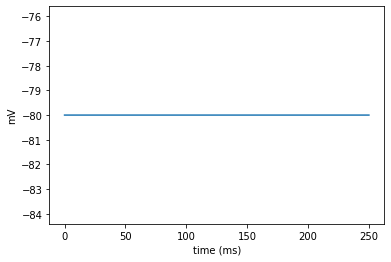

(Vector[115], Vector[114])

In [ ]:
soma = mk_soma(20,20)
run(soma)

###Current-Clamp

Aim: To create a ball and stick model to determine our key parameters and examine their effect in current-clamp recordings

**Rin**

In a current-clamp experiment how do you measure the cells input resistance (Rin)?

Discuss before reading on...


attach a current injecting pipette at the soma


20.0
Done Running


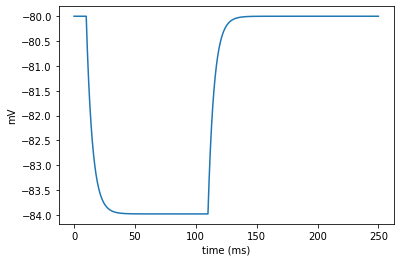

(Vector[40], Vector[39])

In [ ]:
     ic = attach_IC(soma) 
     run(soma)

Given that ic.amp is -0.01 nA. What is the Rin of the cell?

And how does this relate to the passive conductance soma(0.50).pas.g (S.cm2 or 1/g = 5000 ohms.cm2)

In [ ]:
ic.amp, soma(0.5).pas.g, 

(-0.01, 0.0002)

What happens if you change the leak conductance?; soma(0.5).pas.g

20.0
Done Running


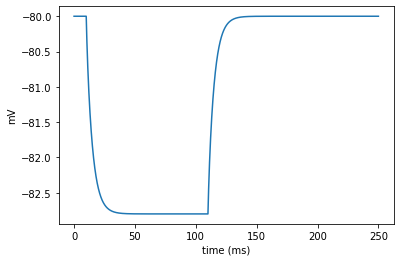

(Vector[49], Vector[48])

In [ ]:
soma(0.5).pas.g = 0.0002
run(soma)

For discussion of converting specific membrane resitance (Rm)) to Rin see https://www.neuron.yale.edu/phpBB/viewtopic.php?f=8&t=2822
      
        Rm = Rin [*106 (scaling for  mega)] * surface area [*10-8 (scaling for um2 to cm2)] 
         = Rm / surface area [4*pie*R^2] [*10-8 (scaling for um2 to cm2)

In [ ]:
(1/soma(0.5).pas.g)/(4*3.14*10**2) * (1e2)

398.0891719745223

**Tau**

In current-clamp experiments what is the membrane time constant and how do you measure it?
What membrane properties determine tau?



20.0
Done Running


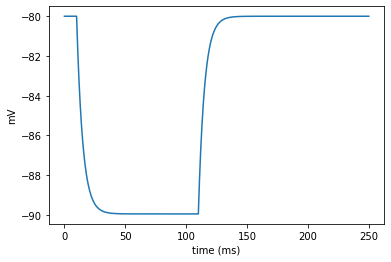

(Vector[6], Vector[5])

In [ ]:
soma = mk_soma(20,20)
ic = attach_IC(soma)
ic.amp=-0.025 
run(soma)

Membrane time constant Tau is estimated as time voltage changes to 66% of it's final value => 5ms

Or in the model calculated from 

		cell area [h.area(0.5)=1256um^2} time 1uF/cm^2	=> 1256 (1e-8) * 1 (1e-6) = 12.56pF

		400mOhms * .012 nF = 4.8ms

In [ ]:
h.area(0.5) * (1e-8)  * 1 * (1e-6) * 400 * (1e3)

1.2566370614359172e-07

**Dendrites**

Attach a dendrite: 


20.0
Done Running


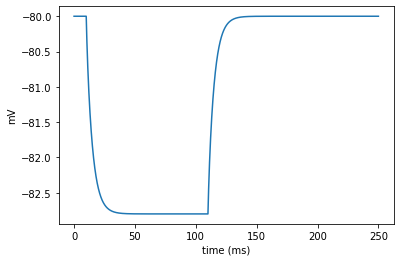

20.0
Done Running


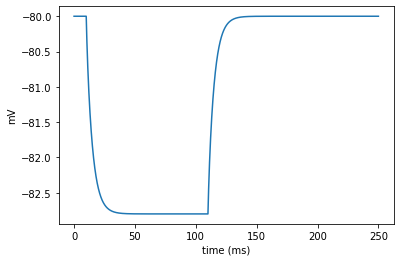

(Vector[54], Vector[53])

In [ ]:
run(soma)
dend = attach_dend(soma, 200, 1)
run(soma)

The Rin is lower with the dendrite but the taus are similar. If Rin decreases shouldn't tau also decrease.
Try with the original soma decreasing the Rin (increasing the passive conductance)

20.0
Done Running


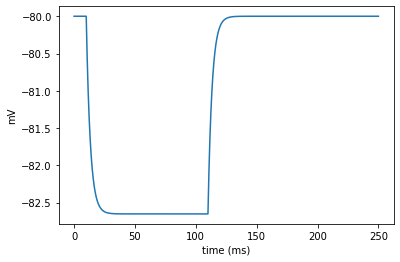

(Vector[56], Vector[55])

In [ ]:
soma = mk_soma(20,20)
ic = attach_IC(soma)
soma(0.5).pas.g = 0.0003
run(soma)

For simplicity try comparing different size somata 

In [ ]:
#enter your code here

#Voltage-Clamp

Aim: To create a ball and stick model to determine our key parameters and examine their effect on the voltage-clamp

Create new soma and attach a single electrode voltage-clamp


20.0
Done Running


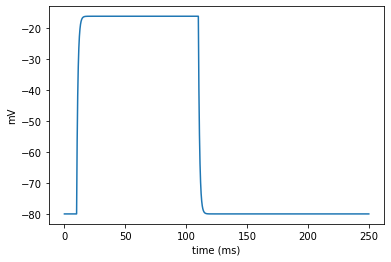

-80.0 0.0 -80.0


In [5]:
soma = mk_soma(20,20)
vc= attach_VC(soma, rs=100)
run(soma)
print(vc[0].amp1, vc[0].amp2, vc[0].amp3)

###Voltage Error

Is there a voltage error, ie Is Vm clamped to Vcmd?

20.0
Done Running


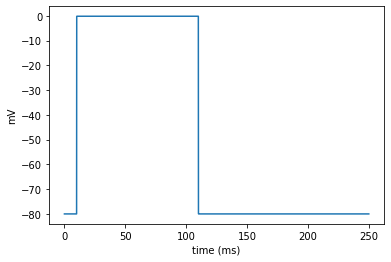

(0.0, 50.0, -1.0, 1.0)

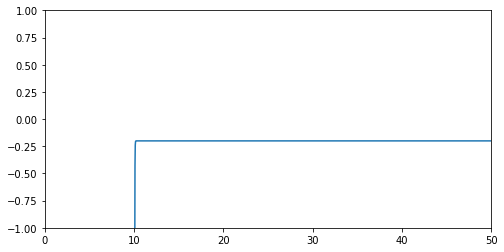

In [ ]:
t_vec, v_vec = run(soma) #outputs time and somatic voltage so can plot 
plt.figure(figsize=(8,4)) # Default figsize is (8,6)
plt.plot(t_vec, v_vec) #ms nA
plt.axis([0, 50, -1, 1])

How is the membrane current related to the voltage error?

plot the Im.

In [ ]:
t_vec, v_vec = run(soma) #outputs time and somatic voltage so can plot 
plt.figure(figsize=(8,4)) # Default figsize is (8,6)
plt.plot(t_vec, vc[1]) #ms nA
#you may need to change scale to see

###Rs
what is the access or series resistance?

In [ ]:
vc[0].rs #MOhms

1.0

Does the voltage error correspond to the Rs?
(Hint Vm1 = V1 - I1*rs)

How would you expect the Rs to affect the voltage error?

Test your prediction by setting new Rs

In [ ]:
soma = mk_soma(20,20)
vc= attach_VC(soma, rs=10)
run(soma)
t_vec, v_vec = run(soma) #outputs time and somatic voltage so can plot 
plt.figure(figsize=(8,4)) # Default figsize is (8,6)
plt.plot(t_vec, vc[1]) #ms nA
#you may need to change scale to see

How could you determine your Rs from the measurments

 (hint Rs = Vcmd/I0)

###Rin###
How could you determine the cells Rin from the measurements? (hint Rin = I1/Vcmd-Rs)

What happens if your cell has a leaky membrane or if you add Cs+ to increase Rin?


Dendrite

Attach a dendrite

how would you expect a dendrite to affect the voltage-clamp at the soma  


20.0
Done Running


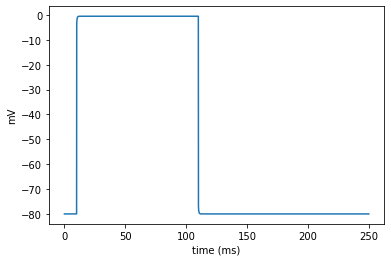

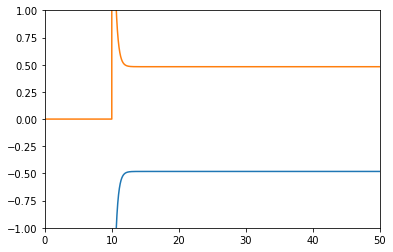

In [ ]:
soma = mk_soma(20,20)
vc= attach_VC(soma)
dend = attach_dend(soma, 200, 3)
t_vec, v_vec=run(soma)
plt.plot(t_vec, v_vec) #ms mV
plt.axis([0, 50, -1, 1])
plt.plot(t_vec, vc[1]) #ms nA

###Space-Clamp###
What do you expect to happen to voltage control in the dendrite and Why?

 before plotting variable against time (t_vec) be sure to have output it from run(stepT) 
     t_vec, v_vec = run()

now you plot against t_vec
     plt.plot(t_vec, dend[1]) #plots dendritic voltage


20.0
Done Running


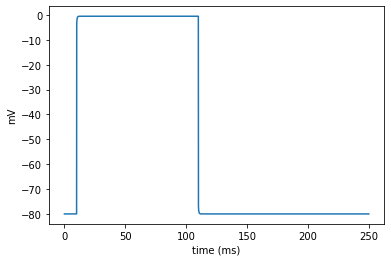

(0.0, 50.0, -10.0, 1.0)

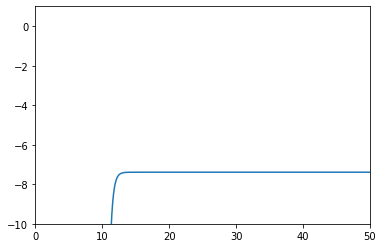

In [ ]:
t_vec, v_vec=run(soma)
plt.plot(t_vec, dend[1]) #plots dendritic voltage
plt.axis([0, 50, -10, 1])

Try adding my mod files from local site.

20.0
Done Running


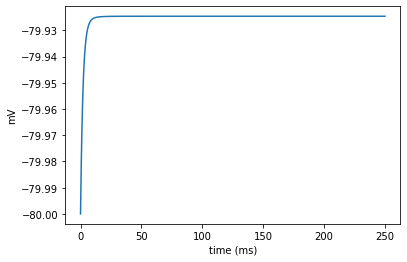

In [ ]:
h.nrn_load_dll("F:\\Bonn\\other\\Teaching\\BIGS_Summer_School\\2021\\model\\mod\\nrnmech.dll")
soma.insert('hh')
run(soma)
dir(soma(0.5).hh) # view the variables
soma(0.5).hh.el = -80
soma.ki = 150 #mM #as default ki is 54 mM for squid axon

0.0001
20.0
Done Running


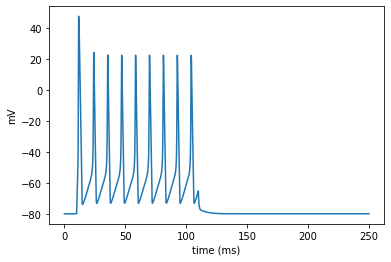

In [ ]:
ic = attach_IC(soma) 
print(soma(0.5).pas.g)
ic.amp = 0.4
soma(0.5).pas.g = 0.0001
run(soma)
ic.amp = 0.1

20.0
Done Running


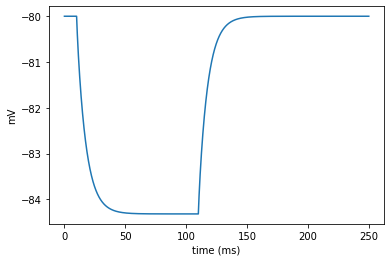

(Vector[27], Vector[26])

In [ ]:
dend = attach_dend(soma, 200, 1)
run(soma)